# Breast Cancer Detection Project

This notebook will look into using various different python-based machine learning libraries, models by evaluating them and improving them through hyperparameter tuning in an attempt to build a machine learning model that is capable of predicting whether someone has breast cancer based on their medical attributes.

## Problem

> Given clinical parameters about a patient, can we predict whether they have breast cancer or not?

## Data

Data is from kaggle: https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset

## Target

Evaluate the model using various different statistics:
* Hyperparameter Tuning
* ROC Curve + Area under the curve (AUC)
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* Feature Importance

> Aiming to reach 95% accuracy when predicting whether a patient has breast cancer or not.

## Features

> y. The outcomes. A factor with two levels denoting whether a mass is malignant ("M") or benign ("B"). => B - 0, M - 1
> x. The predictors. A matrix with the mean, standard error and worst value of each of 10 nuclear measurements on the slide, for 30 total features per biopsy:

x.radius_mean - Mean radius of the tumor cells
x.texture_mean - Mean texture of the tumor cells
x.perimeter_mean - Mean perimeter of the tumor cells
x.area_mean - Mean area of the tumor cells
x.smoothness_mean - Mean smoothness of the tumor cells
x.compactness_mean - Mean compactness of the tumor cells
x.concavity_mean - Mean concavity of the tumor cells
x.concave_points_mean - Mean number of concave portions of the contour of the tumor cells
x.symmetry_mean	Mean - symmetry of the tumor cells
x.fractal_dimension_mean - Mean "coastline approximation" of the tumor cells
x.radius_se - Standard error of the radius of the tumor cells
x.texture_se - Standard error of the texture of the tumor cells
x.perimeter_se - Standard error of the perimeter of the tumor cells
x.area_se - Standard error of the area of the tumor cells
x.smoothness_se - Standard error of the smoothness of the tumor cells
x.compactness_se - Standard error of the compactness of the tumor cells
x.concavity_se - Standard error of the concavity of the tumor cells
x.concave_points_se - Standard error of the number of concave portions of the contour of the tumor cells
x.symmetry_se - Standard error of the symmetry of the tumor cells
x.fractal_dimension_se - Standard error of the "coastline approximation" of the tumor cells
x.radius_worst - Worst (largest) radius of the tumor cells
x.texture_worst - Worst (most severe) texture of the tumor cells
x.perimeter_worst - Worst (largest) perimeter of the tumor cells
x.area_worst - Worst (largest) area of the tumor cells
x.smoothness_worst - Worst (most severe) smoothness of the tumor cells
x.compactness_worst - Worst (most severe) compactness of the tumor cells
x.concavity_worst - Worst (most severe) concavity of the tumor cells
x.concave_points_worst - Worst (most severe) number of concave portions of the contour of the tumor cells
x.symmetry_worst - Worst (most severe) symmetry of the tumor cells
x.fractal_dimension_worst - Worst (most severe) "coastline approximation" of the tumor cells
y - target

## Getting Workspace Ready

In [35]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, \
    RocCurveDisplay

## Exploring Data

In [36]:
df = pd.read_csv("brca.csv")
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [37]:
df.tail()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
564,565,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,M
565,566,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,M
566,567,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,M
567,568,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,M
568,569,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,M


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [39]:
df.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
df.isna().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [41]:
df["y"].value_counts()

B    357
M    212
Name: y, dtype: int64

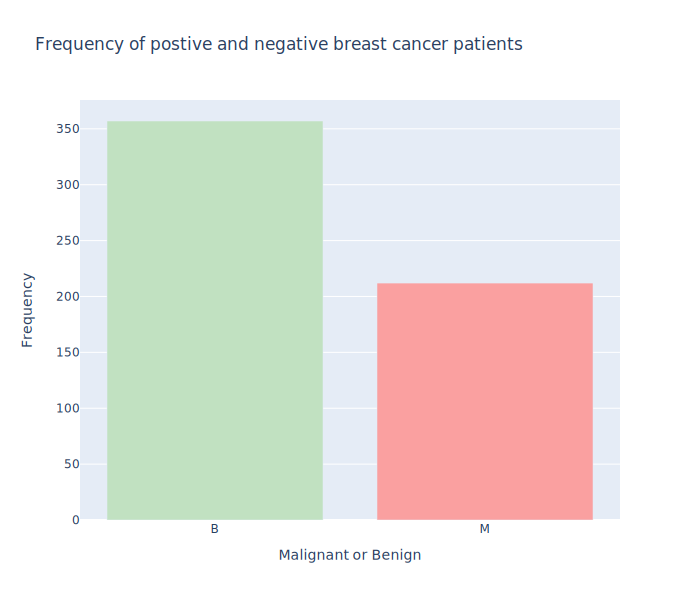

In [42]:
colors = ["#C1E1C1", "#FAA0A0"]

fig = go.Figure(data=[go.Bar(
    x=df["y"].value_counts().index,
    y=df["y"].value_counts(),
    marker_color=colors,
)])

fig.update_layout(showlegend=False, title="Frequency of postive and negative breast cancer patients",
                  xaxis_title="Malignant or Benign", yaxis_title="Frequency",
                  width=700, height=600)
fig.show()
fig.show("svg")

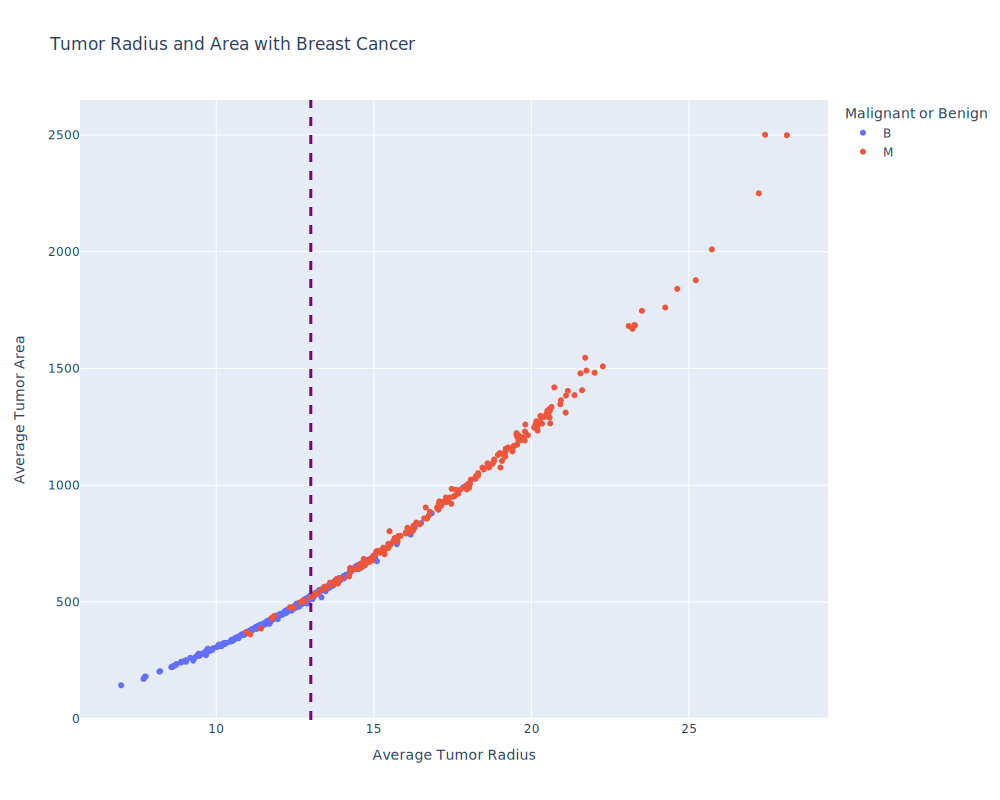

In [43]:
fig = px.scatter(df, x="x.radius_mean", y="x.area_mean",
                 color="y",
                 width=1000, height=800,
                 labels={"y": "Malignant or Benign",
                         "x.radius_mean": "Average Tumor Radius",
                         "x.area_mean": "Average Tumor Area"},
                 title="Tumor Radius and Area with Breast Cancer"
                 )
fig.add_vline(x=13, line_width=3, line_dash="dash", line_color="purple")
fig.show()
fig.show("svg")

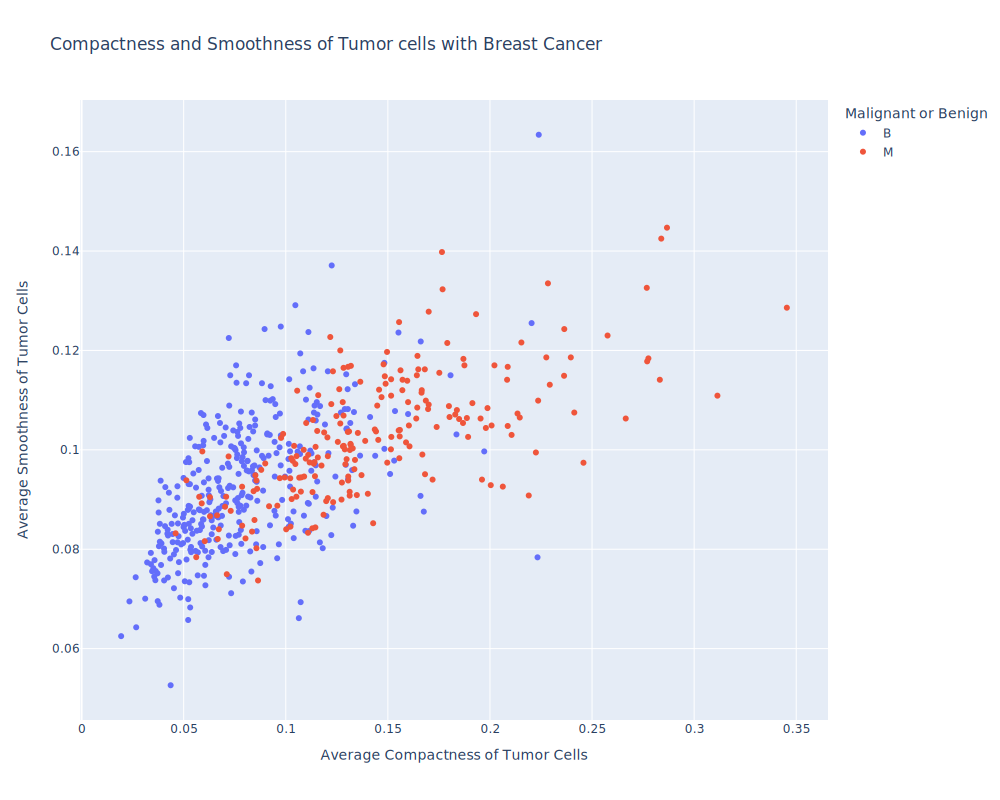

In [44]:
fig = px.scatter(x=df["x.compactness_mean"], y=df["x.smoothness_mean"],
                 width=1000, height=800,
                 color=df.y,
                 labels={"x": "Average Compactness of Tumor Cells",
                         "y": "Average Smoothness of Tumor Cells",
                         "color": "Malignant or Benign"},
                 title="Compactness and Smoothness of Tumor cells with Breast Cancer")
fig.show()
fig.show("svg")

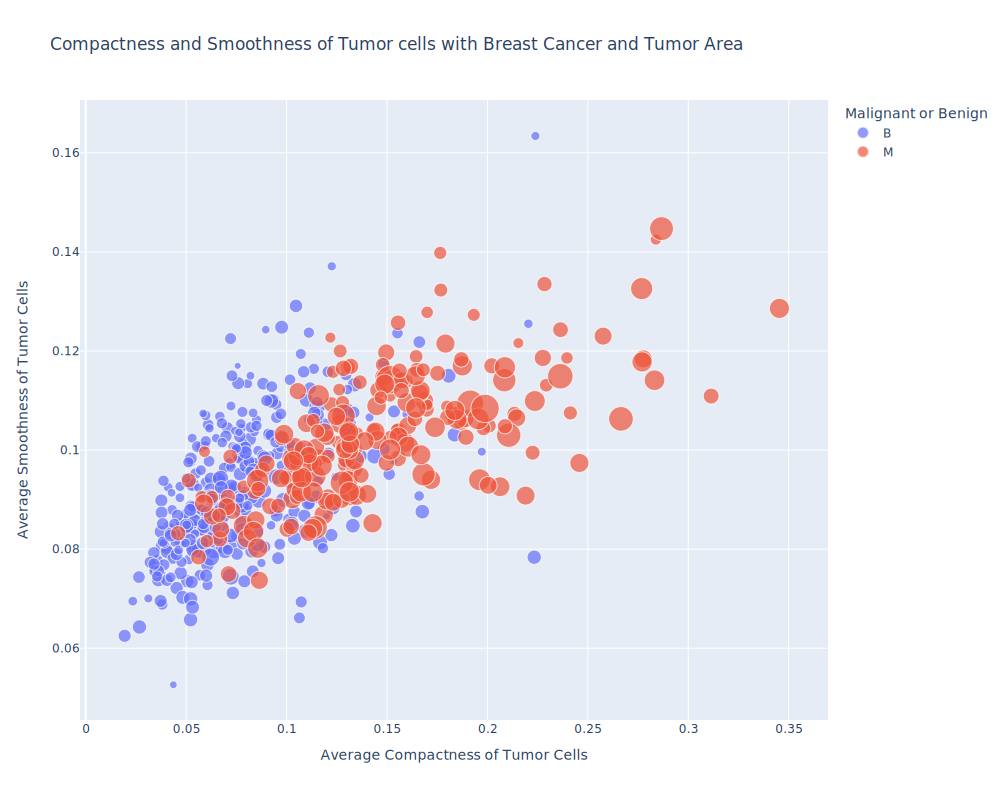

In [45]:
fig = px.scatter(x=df["x.compactness_mean"], y=df["x.smoothness_mean"],
                 width=1000, height=800,
                 color=df.y, size=df["x.area_mean"],
                 labels={"x": "Average Compactness of Tumor Cells",
                         "y": "Average Smoothness of Tumor Cells",
                         "color": "Malignant or Benign"},
                 title="Compactness and Smoothness of Tumor cells with Breast Cancer and Tumor Area")
fig.show()
fig.show("svg")

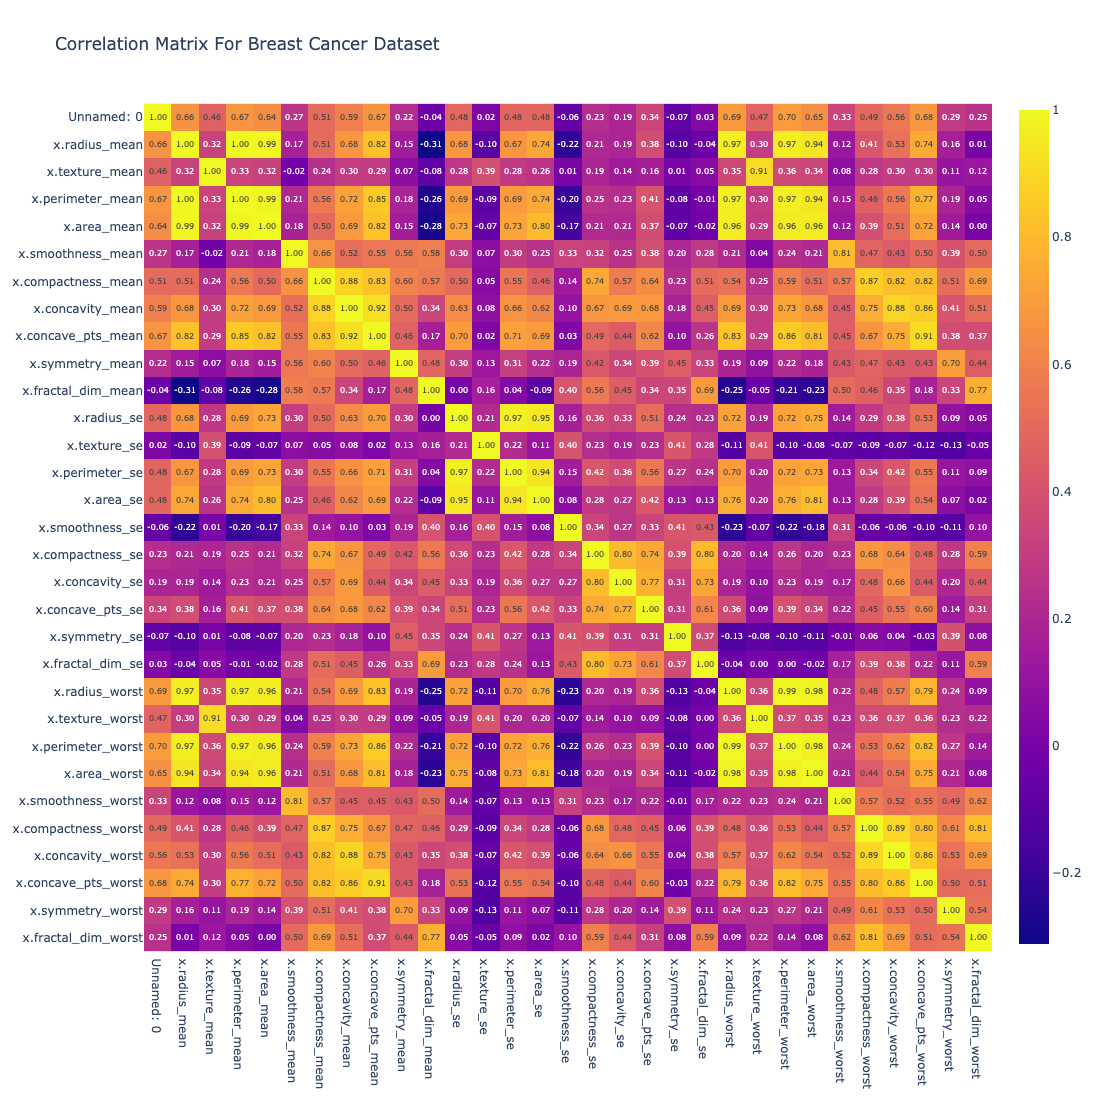

In [59]:
fig = px.imshow(df.drop("y", axis=1).corr(), width=1100, height=1100, text_auto='.2f', title="Correlation Matrix For Breast Cancer Dataset")
fig.show()
fig.show("png")

## Data Cleaning

In [13]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [14]:
# changing y target column to numeric values of 0 and 1, where B is 0  i.e. not harmful and M is 1 i.e. harmful
df.drop("Unnamed: 0", axis=1, inplace=True)
df.replace(to_replace="B", value=0, inplace=True)
df.replace(to_replace="M", value=1, inplace=True)
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [15]:
# Getting data ready for modelling
X = df.drop("y", axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

**Testing seven different machine learning algorithms:**
1. LogisticRegression
2. BaggingClassifier
3. KNeighborsClassifier
4. RandomForestClassifier
5. SVC
6. LinearSVC
7. xgboost

In [17]:
np.random.seed(8)
models = {"Logistic Regression": LogisticRegression(),
          "Bagging Classifier": BaggingClassifier(),
          "K-Neighbors Classifier": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "SVC": SVC(),
          "Linear SVC": LinearSVC(),
          "XGBoost": xgb.XGBClassifier(objective="binary:logistic")}

for name, model in models.items():
    model.fit(X_train, y_train)

## Baseline Model Evaluation

In [18]:
models_scores = {}
for name, model in models.items():
    models_scores[name] = model.score(X_test, y_test)

scores_df = pd.DataFrame(models_scores, index=["Scores"])
scores_df

,Logistic Regression,Bagging Classifier,K-Neighbors Classifier,Random Forest Classifier,SVC,Linear SVC,XGBoost
Scores,0.95614,0.991228,0.947368,0.982456,0.938596,0.649123,0.982456


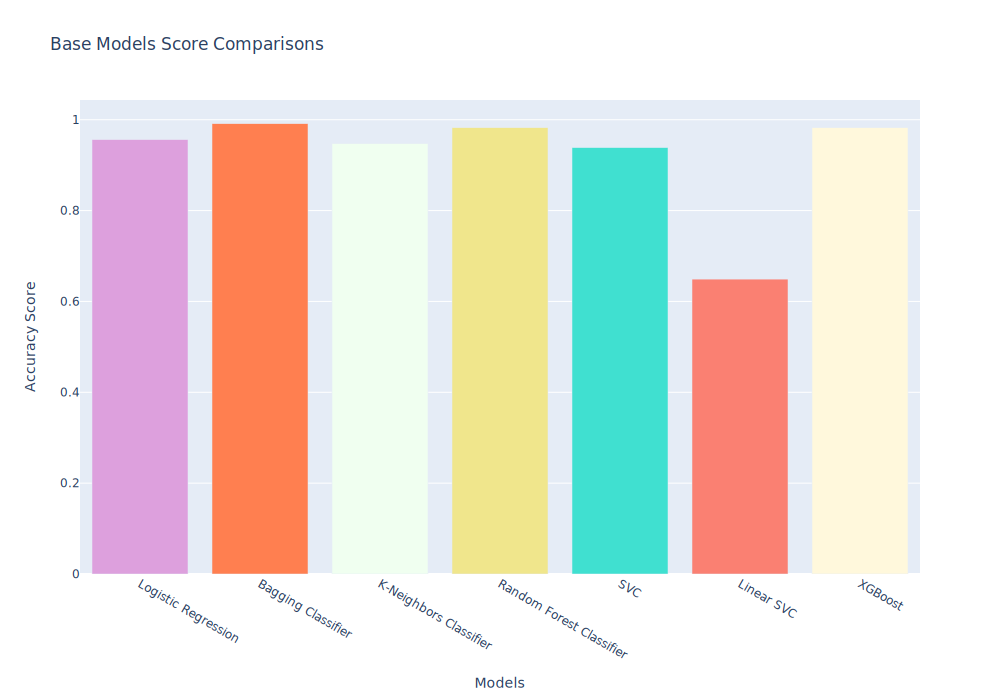

In [19]:
colors = ["plum", "coral", "honeydew", "khaki", "turquoise", "salmon", "cornsilk"]

fig = go.Figure(data=[go.Bar(
    x=scores_df.columns,
    y=scores_df.iloc[0],
    marker_color=colors,
)])
fig.update_layout(title="Base Models Score Comparisons", xaxis_title="Models", yaxis_title="Accuracy Score", width=1000, height=700)
fig.show()
fig.show("svg")

## Hyperparameter Tuning

**Top three models:**
1. Bagging Classifier
2. XGBoost
3. Random Forest Classifier

**Bagging Classifier Hyperparameter Tuning**

In [272]:
param_dict = {"n_estimators": np.arange(200, 2000, 200), "max_samples": [0.5, 0.6, 0.7, 0.8, 1], "max_features": [0.5, 0.6, 0.7, 0.8, 1]}

np.random.seed(8)
bag_clf = BaggingClassifier()

bag_clf_tuned = GridSearchCV(estimator=bag_clf, param_grid=param_dict, n_jobs=-1, cv=5, verbose=1)

bag_clf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.5, 0.6, 0.7, 0.8, 1],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 1],
                         'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800])},
             verbose=1)

In [273]:
bag_clf_tuned.best_params_

{'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 1200}

In [274]:
bag_clf_tuned_score = bag_clf_tuned.score(X_test, y_test)
bag_clf_tuned_score, scores_df["Bagging Classifier"]

(0.9824561403508771,
 Scores    0.991228
 Name: Bagging Classifier, dtype: float64)

**Bagging Classifier Conclusion:** By the looks of it, the default Bagging Classifier performs better by accuracy when predicting whether a patient might have breast cancer or not

**XGBoost Hyperparameter Tuning**

In [255]:
param_dict={'max_depth': np.arange(3, 18, 1),
       'gamma': [0.5, 1, 1.5, 2, 5],
       'reg_alpha' : np.arange(40,180,10),
       'reg_lambda' : [0,1],
       'colsample_bytree' : [0.6, 0.8, 1.0],
       'min_child_weight' : np.arange(0, 10, 1),
       'n_estimators': np.arange(100, 2000, 200),
        'subsample': [0.6, 0.8, 1.0],
}

np.random.seed(8)
xgb_model = xgb.XGBClassifier()
xgb_model_tuned= RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dict, n_iter=500, n_jobs=-1, cv=5, verbose=1)
xgb_model_tuned.fit(X_train, y_train)

/Users/yogeshprabhu/Documents/Computer Science/ml projects/wisconsin-breast-cancer-detection/env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:313: DeprecationWarning:

`product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.



Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'min_child_weight': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900]),
                                        'reg_alpha': array([ 40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160,
       170]),
                                        'reg_lambda': [0, 1],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=1)

In [256]:
xgb_model_tuned.best_params_

{'subsample': 1.0,
 'reg_lambda': 1,
 'reg_alpha': 40,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 11,
 'gamma': 1,
 'colsample_bytree': 0.8}

In [257]:
xgb_model_tuned.score(X_test, y_test)

0.9473684210526315

Further Tuning with GridSearchCV

In [338]:
param_dict={'max_depth': [1, 2, 3],
            'gamma': [1],
            'reg_alpha' : [5, 10, 15, 20],
            'reg_lambda' : [1],
            'colsample_bytree' : [0.4, 0.5, 0.6],
            'min_child_weight' : [4],
            'n_estimators': [60, 100],
            'learning_rate':[0.1, 0.22, 0.23, 0.5, 1]
            }

np.random.seed(8)
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model_tuned= GridSearchCV(estimator=xgb_model, param_grid=param_dict, n_jobs=-1, cv=5, verbose=1)
xgb_model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6], 'gamma': [1],
                         'learning_rate': [0.1, 0.22, 0.23, 0.5, 1],
                         'max_depth': [1, 2, 3], 'min_child_weight': [4],
                         'n_estimators': [60, 100],
                         'reg_alpha': [5, 10, 15, 20], 'reg_lambda': [1]},
             verbose=1)

In [339]:
xgb_model_tuned.best_params_

{'colsample_bytree': 0.4,
 'gamma': 1,
 'learning_rate': 0.22,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 100,
 'reg_alpha': 5,
 'reg_lambda': 1}

In [341]:
xgb_model_tuned_score = xgb_model_tuned.score(X_test, y_test)
xgb_model_tuned_score

0.9912280701754386